In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import plotly_express as px

#  Дисперсионный анализ

Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**.  

А если необходимо провести сравнение 3 и более множеств?  

В таком случае мы можем применять однофакторный дисперсионный анализ.  
Та переменная, которая будет разделять наших испытуемых или наблюдения на группы 
(номинативная переменная с нескольким градациями) называется **независимой переменной**.  
А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)


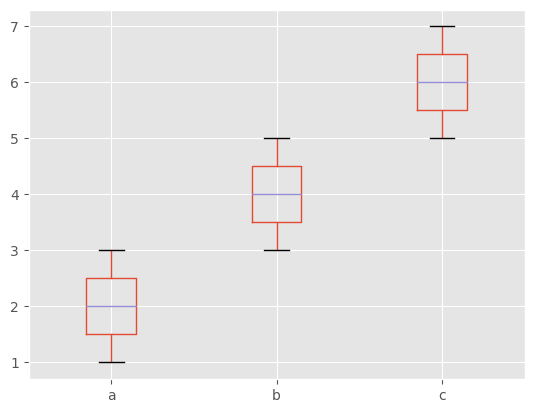

In [2]:
# Выборки которые надо сравнить
data = pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))  # 
print('Альтернативная гипотеза:', f'!({"=".join(data)})')

In [3]:
data

,a,b,c
0,3,5,7
1,1,3,6
2,2,4,5


In [4]:
data.to_numpy().flatten().all() == \
data.values.flatten().all()

True

In [5]:
# общее среднее
grand_mean = data.values.flatten().mean()  #  Return a copy of the ARRAY collapsed into ONE dimension.
grand_mean

4.0

In [6]:
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in data.values.flatten())
sst

30.0

In [7]:
data.mean()

a    2.0
b    4.0
c    6.0
dtype: float64

In [8]:
# items() - Lazily iterate over (index, value) tuples.
# This method returns an iterable tuple (index, value). 
# This is convenient if you want to create a lazy iterator.

data.mean().items()

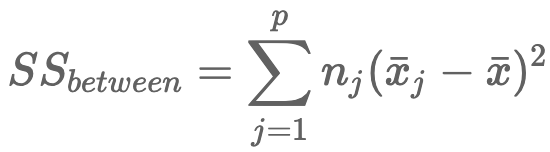

In [9]:
#   index, value  
# for group, group_mean in data.mean().items():
#     print (f'group:{group}, data[group].size:{data[group].size}, group_mean:{group_mean},\
#          (group_mean - grand_mean)^2:{(group_mean - grand_mean)**2},  sum:{data[group].size * (group_mean - grand_mean) ** 2}')

In [10]:
# отклонение групповых средних от общей средней
#         data['a'].size  *  
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
ssb

24.0

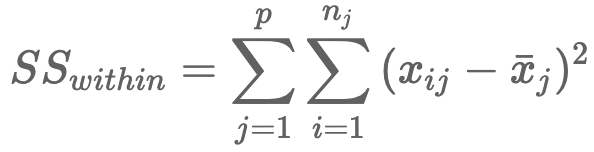

In [11]:
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())
ssw

6.0

In [12]:
# Степени свободы
groups = data.shape[1] # 3
dfb = groups - 1 # 3-1=2
dfw = data.size - groups # 9-3=6
dfb, dfw

(2, 6)

In [13]:
# межгрупповой средний квадрат
mssb = ssb/dfb
mssb

12.0

In [14]:
# внутригрупповой средний квадрат
mssw = ssw/dfw
mssw

1.0

In [15]:
f_value = mssb/mssw
# The survival function is a function that gives the probability 
# that a patient, device, or other object of interest will survive past a certain time.

p = stats.f.sf(f_value, dfb, dfw)
f_value, p

(12.0, 0.008000000000000002)

In [16]:
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

Результат:
отклоняем нулевую гипотезу
Полученное f-значение 12.0


All computations in one shot:

In [17]:
stats.f_oneway(data.a, data.b, data.c)

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

Посмотрим, на распределение в нашем случае
- https://gallery.shinyapps.io/dist_calc/ 



<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными.  
У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах.  
Что это за группы?  
Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

In [18]:
df =\
    pd.DataFrame([[25, 45, 30, 54],
                  [30, 55, 29, 60],
                  [28, 29, 33, 51],
                  [36, 56, 37, 62],
                  [29, 40, 27, 73]],
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [19]:
# As a rule of thumb, if you’re visualizing multiple variables in a plot using statistical software such as R (or some Python vizs) 
# you typically must convert your data to a long format in order for the software to create the plot.

# Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

df_melt = pd.melt(df,  value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = [ 'treatments', 'value']
df_melt.sample(5)

# df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# df_melt.columns = [ 'index','treatments', 'value']

,treatments,value
5,B,45
9,B,40
6,B,55
8,B,56
15,D,54


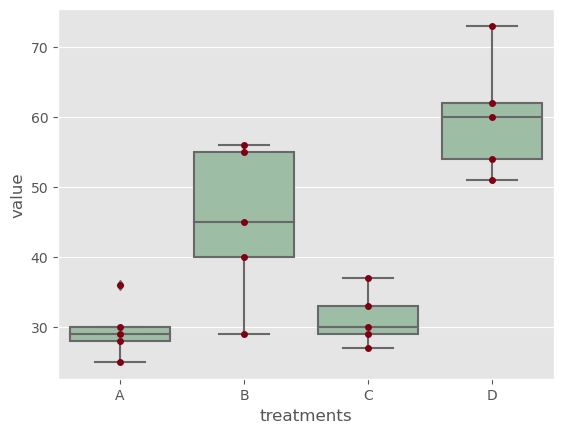

In [20]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [21]:
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=17.493, p=0.000026
Отклоняем нулевую гипотезу, средние, вероятно, различаются


### `Задача:`
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [22]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976,
             0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [23]:
data = pd.DataFrame({'tillamook':pd.Series(tillamook),
                    'newport': pd.Series(newport),
                    'petersburg': pd.Series(petersburg),
                    'magadan': pd.Series(magadan),
                    'tvarminne': pd.Series(tvarminne),
                    }
                    )

In [24]:
# Perform one-way ANOVA.

# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 
# The test is applied to samples from two or more groups, possibly with differing sizes.


stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

Groups have **NOT** the same population mean

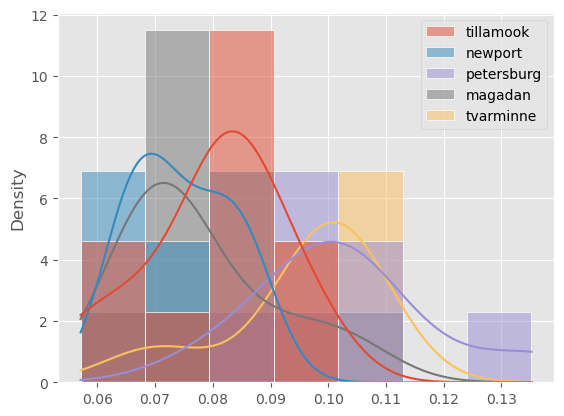

In [25]:
sns.histplot(data, kde=True,  stat="density", edgecolor= (1,)*4) ;

We can assume that `tvarminne` & `petersburg` are the SAME population.  
So `tillamook`, `newport`, `magadan` do.

Let's check.

F_onewayResult(statistic=0.8816877976677155, pvalue=0.36790082429832877)

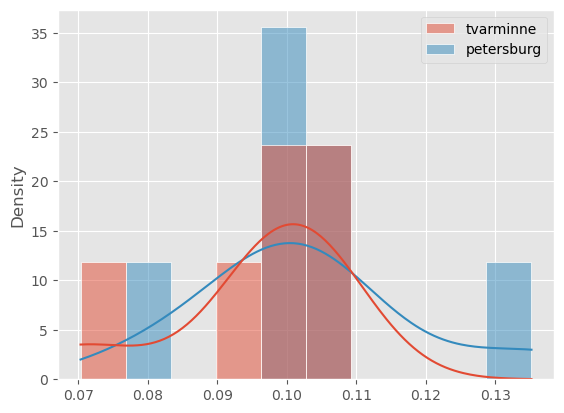

In [26]:
sns.histplot(data.loc[:,('tvarminne','petersburg')], kde=True,  stat="density", edgecolor= (1,)*4) ;
stats.f_oneway(petersburg,  tvarminne)

These samples have the SAME population mean.

F_onewayResult(statistic=0.8816877976677155, pvalue=0.36790082429832877)

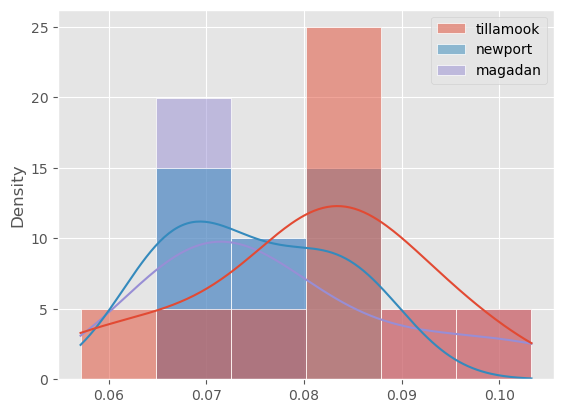

In [27]:
sns.histplot(data.loc[:,('tillamook', 'newport', 'magadan')], kde=True,  stat="density", edgecolor= (1,)*4) ;
stats.f_oneway(petersburg,  tvarminne)

We have no reason to assert that the population means differ.

## Почему мы не можем применить t-критерий для более чем двух выборок
**применяя его попарно к каждой выбрке**

Чтобы выяснить это, сделаем эксперемент.

In [28]:
def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2) /
                              N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = stats.t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = np.random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)

    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    # draw a pie chart
    ax.pie(percentage, labels=unique, autopct='%.0f%%')

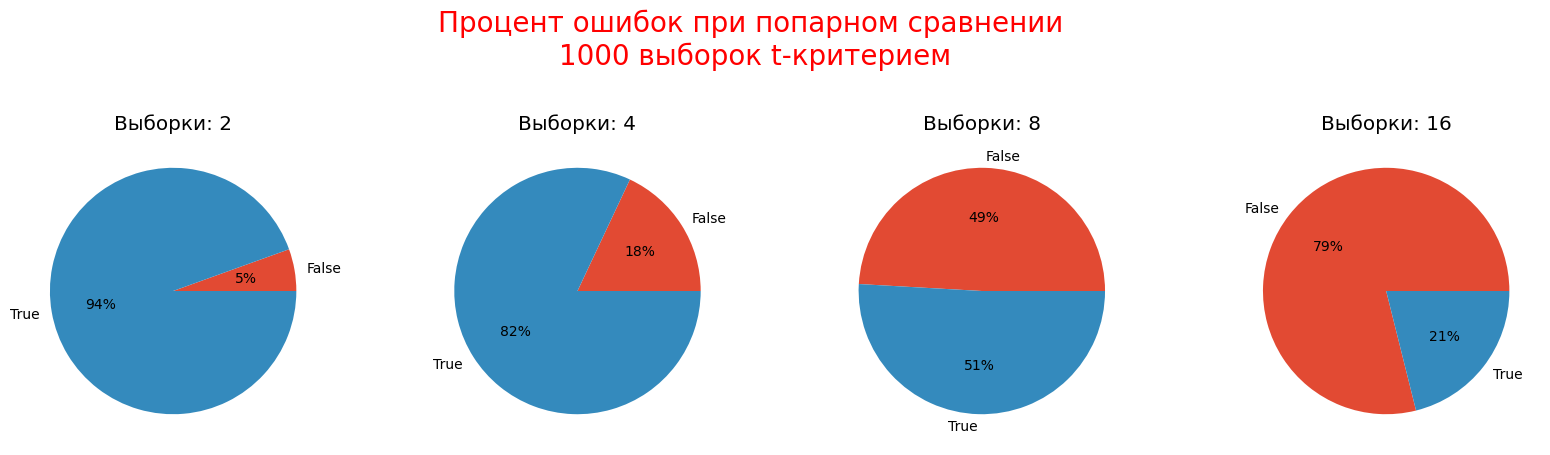

In [29]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнении \n1000 выборок t-критерием', fontsize = 20, c = 'r', y=1.2)

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 30, ax)
    ax.set_title(f'Выборки: {n}')
    
plt.show()

При сравнение выборок из одной ГС с помощью t-критерия с p-уровнем значимости **95%** получаем следующие ошибки:
* **2** выборки - **5%**
* **4** выборки- **20%** 
* **8** выборок- **50%** 
* **16** выборок- **80%**

А теперь с поправкой Бонферрони:  
### $\alpha = \frac {0.05}{n * (n - 1) / 2}$

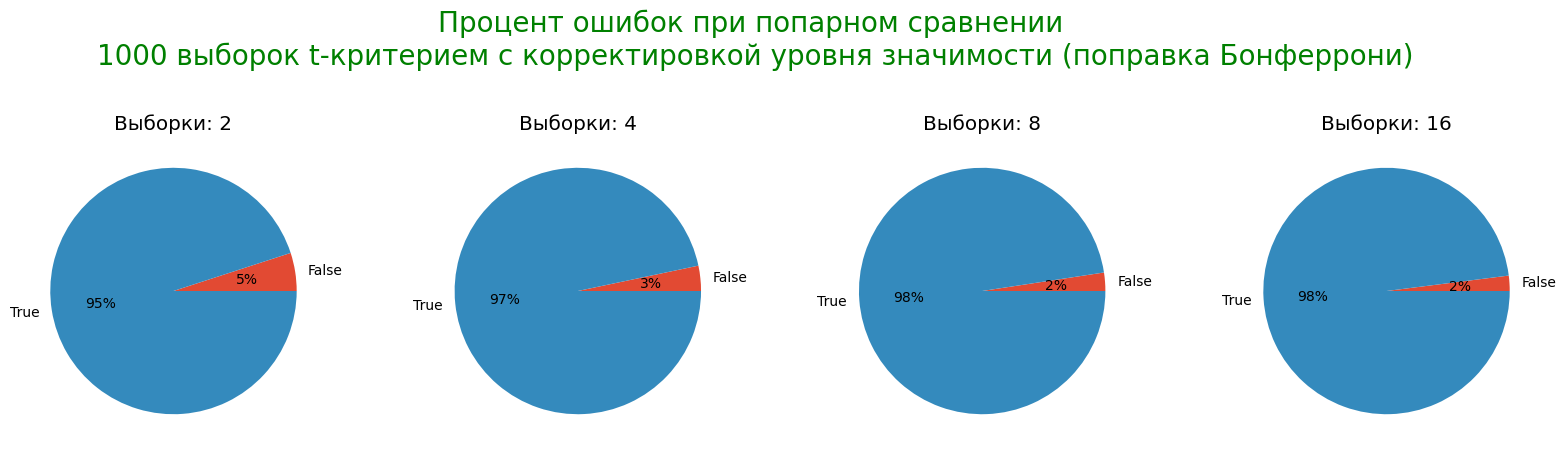

In [30]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнении \n1000 выборок t-критерием с корректировкой уровня значимости (поправка Бонферрони)', fontsize = 20, c = 'green', y=1.2)

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2) # делим на число сравнений = ((n*(n-1))/2) - поправка Бонферрони 
    pair_t_test(1000, n, 30, ax, alpha)
    ax.set_title(f'Выборки: {n}')
plt.show()

Однако в данном случае эта будет сверх-консервативная корректировавка, которая имеет меньше вероятность найти реальные значения. По сути мы **уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**.


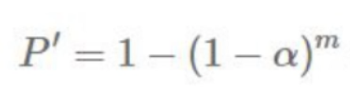

In [31]:
# m - number of paired observations  n*(n-1)/ 2
alpha = 0.05
N = 1 # 8 groups
for N in np.logspace(1, 5, base= 2, num= 5):
    m = N * (N-1)/2
    print(f'Number of groups: {N:>5.0f}, paired obs.:{m:>7.0f},  alpha: {1 -(1 - alpha)**m:.05f}')

Number of groups:     2, paired obs.:      1,  alpha: 0.05000
Number of groups:     4, paired obs.:      6,  alpha: 0.26491
Number of groups:     8, paired obs.:     28,  alpha: 0.76217
Number of groups:    16, paired obs.:    120,  alpha: 0.99788
Number of groups:    32, paired obs.:    496,  alpha: 1.00000


# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




### `Задание № 1`
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [32]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [33]:
stats.shapiro(A), stats.shapiro(B)

(ShapiroResult(statistic=0.9947169423103333, pvalue=0.9671542048454285),
 ShapiroResult(statistic=0.9923807382583618, pvalue=0.8480783104896545))

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

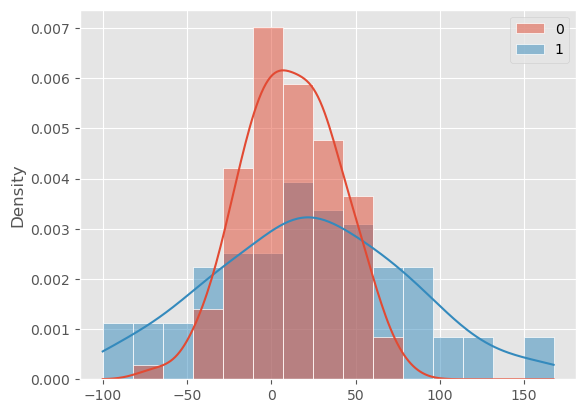

In [34]:
sns.histplot((A,B), kde=True,  stat="density", edgecolor= (1,)*4) ;
stats.ttest_ind(A, B)

##### We have NO reason to reject the null hypothesis. 

### `Задание № 2`
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [35]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stats.shapiro(A), stats.shapiro(B)

(ShapiroResult(statistic=0.9947169423103333, pvalue=0.9671542048454285),
 ShapiroResult(statistic=0.9923807382583618, pvalue=0.8480783104896545))

As groups are RELATED we use paired t-test.

In [36]:
stats.ttest_rel(A, B)

Ttest_relResult(statistic=-2.170170373521071, pvalue=0.03238579156467659)

In [37]:
stats.wilcoxon(A, B)

WilcoxonResult(statistic=1930.0, pvalue=0.04077572901549266)

The t-test on TWO RELATED samples and  Wilcoxon test prove  the presence of the effect (means are different in paired groups).

### `Задание № 3`
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [38]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

data = pd.DataFrame({'water':pd.Series(water),
                    'nutri': pd.Series(nutri),
                    'mineral': pd.Series(mineral),
                    }
                    )
stats.shapiro(water), stats.shapiro(nutri), stats.shapiro(mineral)

(ShapiroResult(statistic=0.9142923355102539, pvalue=0.07698187232017517),
 ShapiroResult(statistic=0.9351286888122559, pvalue=0.1743539571762085),
 ShapiroResult(statistic=0.9149779081344604, pvalue=0.06890825927257538))

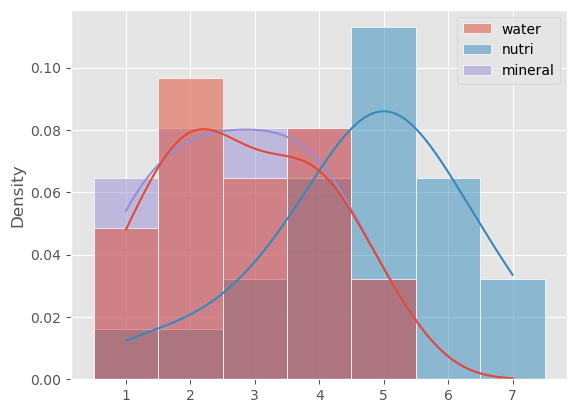

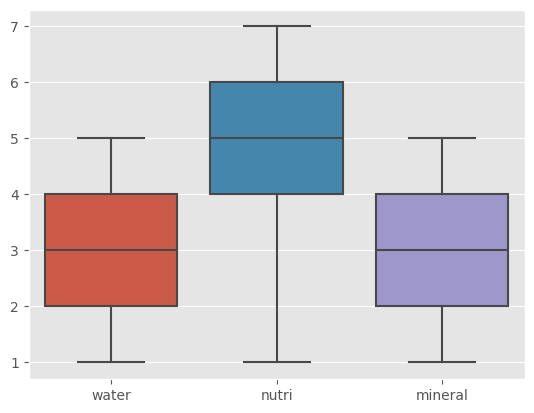

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

In [39]:
sns.histplot(data, kde=True,  stat="density", discrete= True,edgecolor= (1,)*4) ;  #.loc[:,('water','petersburg')] 
plt.show()
sns.boxplot(data)
plt.show()
stats.f_oneway(water,nutri,mineral)

Groups have different population means.  
Nutri hasn't the same mean but
Mineral and Water have the same population mean.  
Let's check it

F_onewayResult(statistic=0.010260999552998775, pvalue=0.9198340218471527)

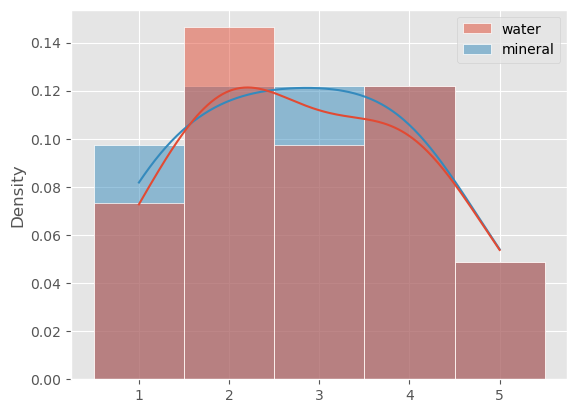

In [40]:
sns.histplot(data.loc[:,('water','mineral')], kde=True,  stat="density", discrete= True, edgecolor= (1,)*4) ; 
stats.f_oneway(water,mineral)

Nutri has proven effective

### `Задание`
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гипотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 

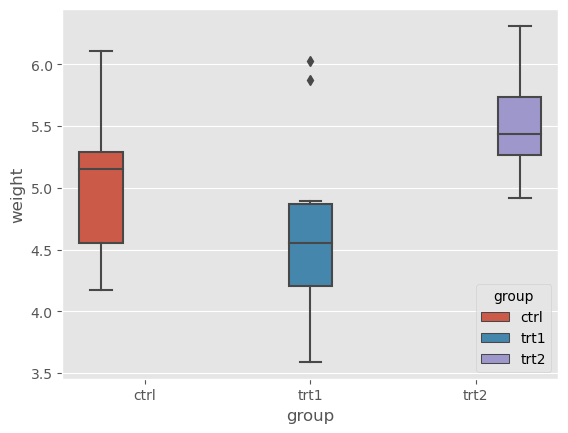

In [41]:
dd = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/PlantGrowth.csv')
# dd.boxplot('weight', by='group', figsize=(12, 8))
# plt.show()
sns.boxplot(data=dd,x='group', y='weight',hue='group');


Let's check for the outliers.

In [42]:
dd.query('group == "trt1"').loc[:,['weight']].style.bar(align='left', color = 'orange')

,weight
10,4.810000
11,4.170000
12,4.410000
13,3.590000
14,5.870000
15,3.830000
16,6.030000
17,4.890000
18,4.320000
19,4.690000


In [43]:
dd.query('group == "trt1"')[np.abs(stats.zscore(dd.query('group == "trt1"').weight) ) > 3].count()

Unnamed: 0    0
weight        0
group         0
dtype: int64

No outliers with a z-score > 3.  
So let's leave it as it is

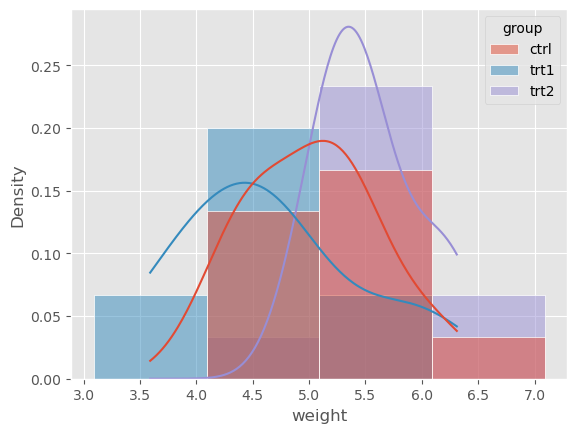

In [44]:
sns.histplot(dd, x=dd.weight, hue= 'group', kde=True,  stat="density", discrete= True, edgecolor= (1,)*4) ; 

In [45]:
stats.f_oneway(dd.query('group == "ctrl"').weight, dd.query('group == "trt1"').weight, dd.query('group == "trt2"').weight)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

`Ctrl` and `trt1` groups have no effect

In [46]:
stats.f_oneway(dd.query('group == "ctrl"').weight, dd.query('group == "trt1"').weight,)

F_onewayResult(statistic=1.4191012973623165, pvalue=0.24902316597300575)

Group `trt2` has the statistically significant effect.

# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [47]:
data = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/cookie_cats.csv', on_bad_lines='skip')  
data.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [48]:
data.groupby('version').agg(users_count=pd.NamedAgg(column="version", aggfunc="count")).style.bar(align='left', cmap='Set2')

,users_count
version,
gate_30,44700
gate_40,45489


 В выборке **игроков v30 меньше** `(44700 < 45489)`

In [49]:
# Croping outliers z-score > 3

mask = data[np.abs(stats.zscore(data.sum_gamerounds) ) > 3].index
data_croped = data.drop(index = mask) 

`Interactive Visualizations`

In [50]:
fig = px.histogram(data_croped, x='sum_gamerounds', color='version', height= 700,
        barmode= 'overlay', opacity=0.3 ,color_discrete_map = {'gate_40':'blue','gate_30':'red'})
fig.update_traces(marker_line_width=1,marker_line_color="white")
fig.update_xaxes(range=[0, 200])

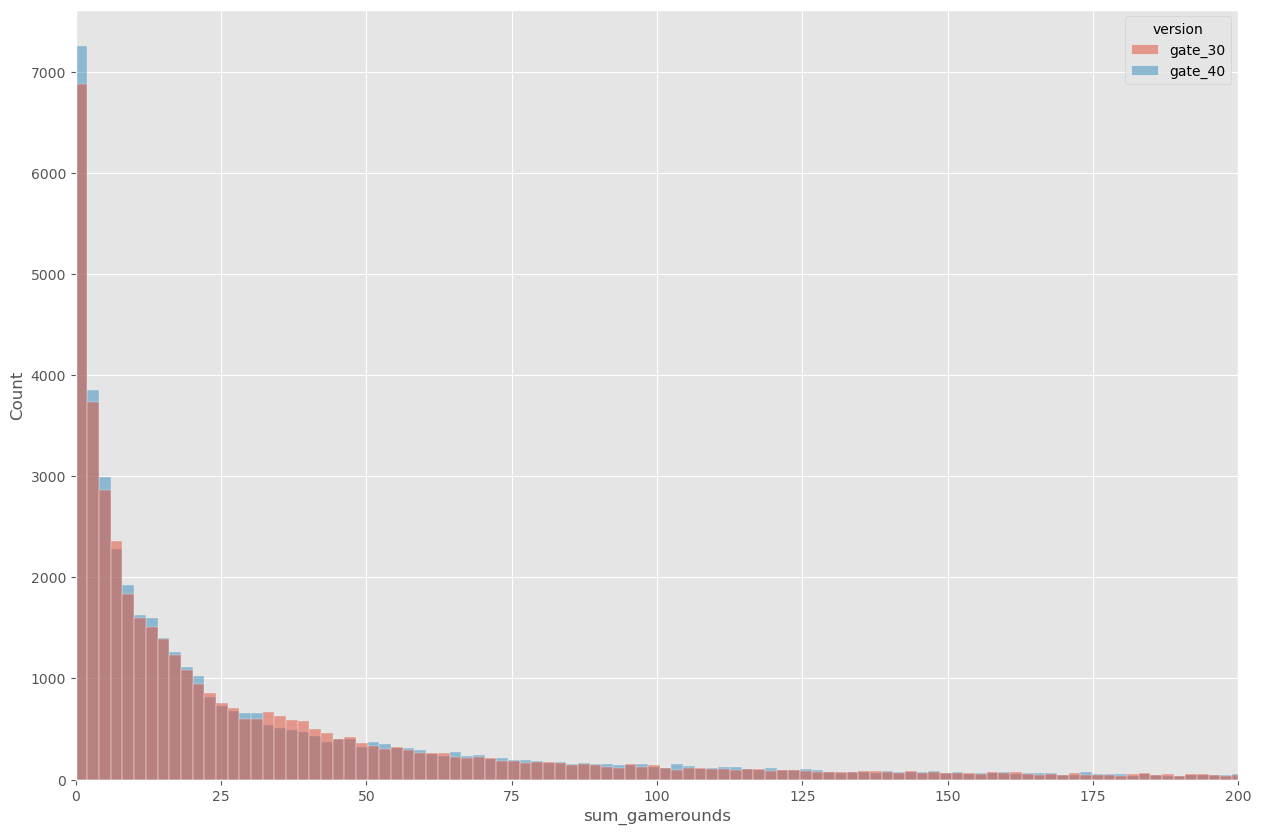

In [51]:
plt.figure(figsize=(15, 10))
sns.histplot(data_croped, x='sum_gamerounds', hue='version')
plt.xlim([0, 200]);

  1. В диапазоне 25-50 пройденных раундов за неделю версия v30 показывает большую частоту.  
  1. В диапазоне 1-5 больше играли в v40, но retention_1 хуже. (Игроки переиграли, устали и не вернулись)  
  1. В диапазоне 10-20 больше играли в v40.

  А что с результами спустя неделю? 

In [52]:
data.pivot_table(index = ['version'], columns = ['retention_7'], values = 'userid', 
    aggfunc = 'count', fill_value = "", margins= False).style.bar(align='left', cmap='Set2')

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


* Не смотря на то, что **игроков v30 меньше** `(44700 < 45489)`, версия **v30** :
    * **опережает** v40 по уровню возврата через 7 дней после установки `(8502 > 8279)`
    * **меньше** не вернувшихся `(36198 < 37210)`
    

In [53]:
data.iloc[:,1:].groupby('version').mean().style.bar(align='mid', color='coral')

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,52.456264,0.448188,0.190201
gate_40,51.298776,0.442283,0.182000


* Версия **v30 опережает** v40 по `средним значениям`:
    * количества  `игровых раундов`, сыгранных игроком в течение первой недели после установки `(52.4 > 51.3)`
    * уровня возврата через `1` день после установки `(0.45 > 0.44)`
    * уровня возврата через `7` дней после установки `(0.19 > 0.18)`

In [54]:
data.pivot_table(index = ['version'], columns = ['retention_7'], values = 'userid', 
    aggfunc = 'count', fill_value = "", margins= False).style.bar(align='left', cmap='Set2')

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [55]:
print (f'Уровень удержания игрока (возврата) через 7 дней после установки версии v30: {8502/44700:.04f}')

Уровень удержания игрока (возврата) через 7 дней после установки версии v30: 0.1902


  `Формально цифры v30 говорят о лучшем удержании клиентов.  
  На сколько эти данные статистически значимы?`

In [56]:
# data.groupby(['version','retention_7']).agg(retention_7_count=pd.NamedAgg(column="retention_7", aggfunc="count"),
#                                             sum_gamerounds=pd.NamedAgg(column="sum_gamerounds", aggfunc="sum"),
#                                             mean_gamerounds=pd.NamedAgg(column="sum_gamerounds", aggfunc="mean")).style.bar(align='mid')

<div class="alert alert-info">
<b>Задание: Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот. </b>
</div>


In [57]:
# данные не нормальные, поэтому mannwhitneyu

stat, p = stats.mannwhitneyu(data_croped[data_croped.version == 'gate_30'].sum_gamerounds, data_croped[data_croped.version == 'gate_40'].sum_gamerounds)
print(f'Statistics={stat:.3f}, p={p:.3f}')

Statistics=1015257071.500, p=0.036


**Ваши выводы?** 

Отклоняем Н0 => распределения различны. И старая версия показывает даже лучшие результаты.  

## Необходимо `ОСТАВИТЬ v30`.

### Усложним bootstrap, ограничив всего 50 выборками размером 5% от исходной

In [58]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

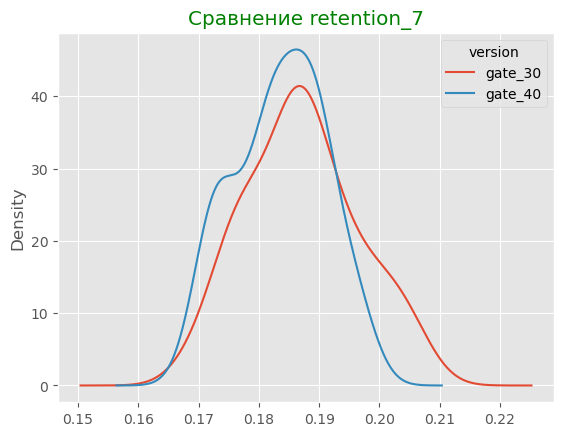

In [59]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий
N = 50
frac = 0.05
# Creating a list with bootstrapped means for each AB-group
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(N):
    #                               replace=    Allow or disallow sampling of the same row more than once.
    boot_mean = data.sample(frac=frac, replace=True).groupby('version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')
plt.title('Сравнение retention_7', c='g')
plt.show()

In [60]:
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [61]:
stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=1.528, p=0.07057
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [62]:
stats.ttest_ind(boot_1d.gate_30,boot_1d.gate_40)

Ttest_indResult(statistic=2.1734392591154643, pvalue=0.032156509427531496)

Даже в выборках размером 5% от исходной наблюдается статистически значимый результат

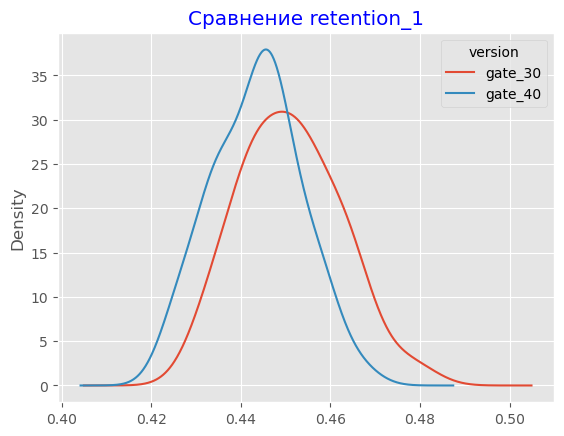

Ttest_indResult(statistic=3.573937322607028, pvalue=0.0005476258432895425)

In [63]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий
N = 50
frac = 0.05
# Creating a list with bootstrapped means for each AB-group
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(N):
    #                               replace=    Allow or disallow sampling of the same row more than once.
    boot_mean = data.sample(frac=frac, replace=True).groupby(
        'version')['retention_1'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')
plt.title('Сравнение retention_1',c='b')
plt.show()
stats.ttest_ind(boot_1d.gate_30,boot_1d.gate_40)

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [64]:
pokemon = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [65]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [66]:
pokemon['Class 1'].isna().sum(),pokemon['Class 2'].isna().sum()

(0, 386)

In [67]:
mask = pokemon [ pokemon['Class 2'].isna() == False].index
pk = pokemon.drop(index = mask)

In [68]:
pk['Class 1'].unique()

array(['Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground',
       'Fairy', 'Fighting', 'Psychic', 'Grass', 'Dragon', 'Rock', 'Dark',
       'Ghost', 'Steel', 'Ice', 'Flying'], dtype=object)

In [69]:
grass = pk.loc[pk['Class 1'] == 'Grass'].Attack
rock = pk.loc[pk['Class 1'] == 'Rock'].Attack
data = pd.DataFrame({'grass':pd.Series(grass),
                    'rock': pd.Series(rock),
                    }
                    )

In [70]:
stats.shapiro(grass),stats.shapiro(rock)

(ShapiroResult(statistic=0.9623432755470276, pvalue=0.30067211389541626),
 ShapiroResult(statistic=0.984890878200531, pvalue=0.9846584796905518))

Both distributions are Normal => stats.ttest_ind(grass, rock)

Статистика=-3.602, p=0.00086
Отклоняем нулевую гипотезу, средние, вероятно, различаются


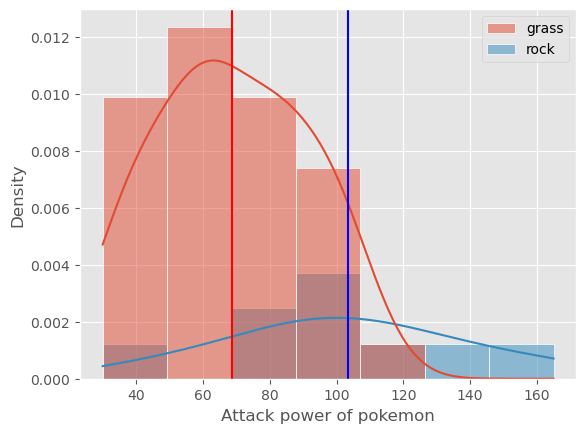

In [71]:
sns.histplot(data, kde=True,  stat="density", edgecolor= (1,)*4) ;
plt.axvline(data.grass.mean(),c='r')
plt.axvline(data.rock.mean(),c='b')
plt.xlabel('Attack power of pokemon')
# Both distributions are Normal => 
stat,p = stats.ttest_ind(grass, rock)
print('Статистика=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Профессор не прав.  
Более сильная обычная атака у `Rock`.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [72]:
water = pk.loc[pk['Class 1'] == 'Water'].Speed
normal = pk.loc[pk['Class 1'] == 'Normal'].Speed
data = pd.DataFrame({'water':pd.Series(water),
                    'normal': pd.Series(normal),
                    }
                    )

In [73]:
stats.shapiro(water),stats.shapiro(normal)

(ShapiroResult(statistic=0.9750770926475525, pvalue=0.2660429775714874),
 ShapiroResult(statistic=0.9685876965522766, pvalue=0.1184217780828476))

Both distributions are Normal => stats.ttest_ind(grass, rock)

Статистика=-0.353, p=0.72479
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


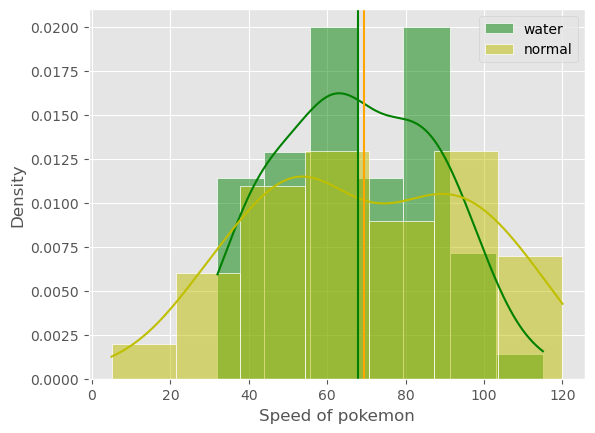

In [74]:
sns.histplot(data.water, kde=True,  stat="density", color='g' ,edgecolor= (1,)*4, label='water')
sns.histplot(data.normal, kde=True,  stat="density", color='y' ,edgecolor= (1,)*4, label='normal') 
plt.axvline(data.water.mean(),c='g')
plt.axvline(data.normal.mean(),c='orange')
plt.legend()
plt.xlabel('Speed of pokemon')
# Both distributions are Normal => 
stat,p = stats.ttest_ind(water, normal)
print('Статистика=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Нет оснований считать, что скорость `Water` и `Normal` существенно отличается.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [75]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [76]:
for nn in treathed_pokemon:
    if pk[pk.Name == nn].shape[0]:
        # own speed
        own_speed = pk[pk.Name == nn ].Speed.values[0]
        # pokemon class
        cl = pk[pk.Name == nn ]['Class 1'].values[0]
        # pokemon class speed mean
        cl_speed = pk[pk['Class 1'] == cl].Speed.mean()
        print(f'Name: {nn.ljust(20)}, class:{cl.rjust(8)}, class speed:{cl_speed:.01f}, own speed: {own_speed}, class statistics{stats.ttest_1samp(pk.Speed, own_speed)}')

Name: Mega Alakazam       , class: Psychic, class speed:78.9, own speed: 150, class statisticsTtest_1sampResult(statistic=-56.0698753940948, pvalue=2.6069207267755507e-187)
Name: Deoxys Normal Forme , class: Psychic, class speed:78.9, own speed: 150, class statisticsTtest_1sampResult(statistic=-56.0698753940948, pvalue=2.6069207267755507e-187)


Скорость обоих покемонов существенно `превышает среднюю скорость их классов`.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [77]:
pokemon['feat_sum'] = pokemon.HP + pokemon.Attack + pokemon.Defense
pokemon['feat_mult'] = pokemon.HP * pokemon.Attack * pokemon.Defense

In [78]:
stats.ttest_ind(pokemon[pokemon.Legendary == False].feat_sum, pokemon[pokemon.Legendary].feat_sum )

Ttest_indResult(statistic=-11.591852366462316, pvalue=7.970942205722087e-29)

In [79]:
stats.ttest_ind(pokemon[pokemon.Legendary == False].feat_mult, pokemon[pokemon.Legendary].feat_mult )

Ttest_indResult(statistic=-13.263253408231844, pvalue=1.992664308842282e-36)

`Legendary pokemons по сумме и произведению характеристик статистически значимо отличаются от своих обычных собратьев. `

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил 4 класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [80]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [81]:
df = pokemon[pokemon['Class 1'].isin(best_defence_class)][['Class 1','Defense']]

In [82]:
px.box(df, y='Defense', x='Class 1', color='Class 1', width= 600)

In [83]:
print(stats.f_oneway(df[df['Class 1'] == 'Rock'].Defense.values, 
                                df[df['Class 1'] == 'Ground'].Defense.values,
                                df[df['Class 1'] == 'Steel'].Defense.values,
                                df[df['Class 1'] == 'Ice'].Defense.values,
                                )
)
print('\nAre means  significantly different from each other?\n')
tukey = pairwise_tukeyhsd(endog=df.Defense.values,
                          groups= df['Class 1'].values,
                          alpha=0.05)
print(tukey)

F_onewayResult(statistic=10.576882027817977, pvalue=3.0803014649204294e-06)

Are means  significantly different from each other?

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice -13.4271 0.5457 -39.7195 12.8653  False
Ground   Rock  15.9517 0.2613  -6.6698 38.5733  False
Ground  Steel  41.5266 0.0002  16.0826 66.9707   True
   Ice   Rock  29.3788 0.0128   4.6707 54.0869   True
   Ice  Steel  54.9537    0.0  27.6379 82.2695   True
  Rock  Steel  25.5749   0.03   1.7716 49.3783   True
-----------------------------------------------------


Профессор не прав.  
`Статистически классы различимы:`
* Ground - Steel
*    Ice - Rock
*    Ice - Steel
*   Rock - Steel